## **Analyse Univariée**

In [1]:
from config import *

In [3]:
# Importation des données
df = pd.read_csv(r'C:\Users\HP1\OneDrive\Bureau\PROJETS_DATA\Projet_Credit_Card_Model\Data\Credit-Card-Train-Clean.csv')
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Credit_History
0,5849,0.0,128.0,360.0,Male,No,0,Graduate,No,Urban,Y,1.0
1,4583,1508.0,128.0,360.0,Male,Yes,1,Graduate,No,Rural,N,1.0
2,3000,0.0,66.0,360.0,Male,Yes,0,Graduate,Yes,Urban,Y,1.0
3,2583,2358.0,120.0,360.0,Male,Yes,0,Not Graduate,No,Urban,Y,1.0
4,6000,0.0,141.0,360.0,Male,No,0,Graduate,No,Urban,Y,1.0


C:\Users\HP1\AppData\Local\Temp\ipykernel_4212\2051586256.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i, 1], order=sorted(df[col].unique()), palette=palette, hue=None)
C:\Users\HP1\AppData\Local\Temp\ipykernel_4212\2051586256.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i, 1], order=sorted(df[col].unique()), palette=palette, hue=None)
C:\Users\HP1\AppData\Local\Temp\ipykernel_4212\2051586256.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i, 1], order=sorted

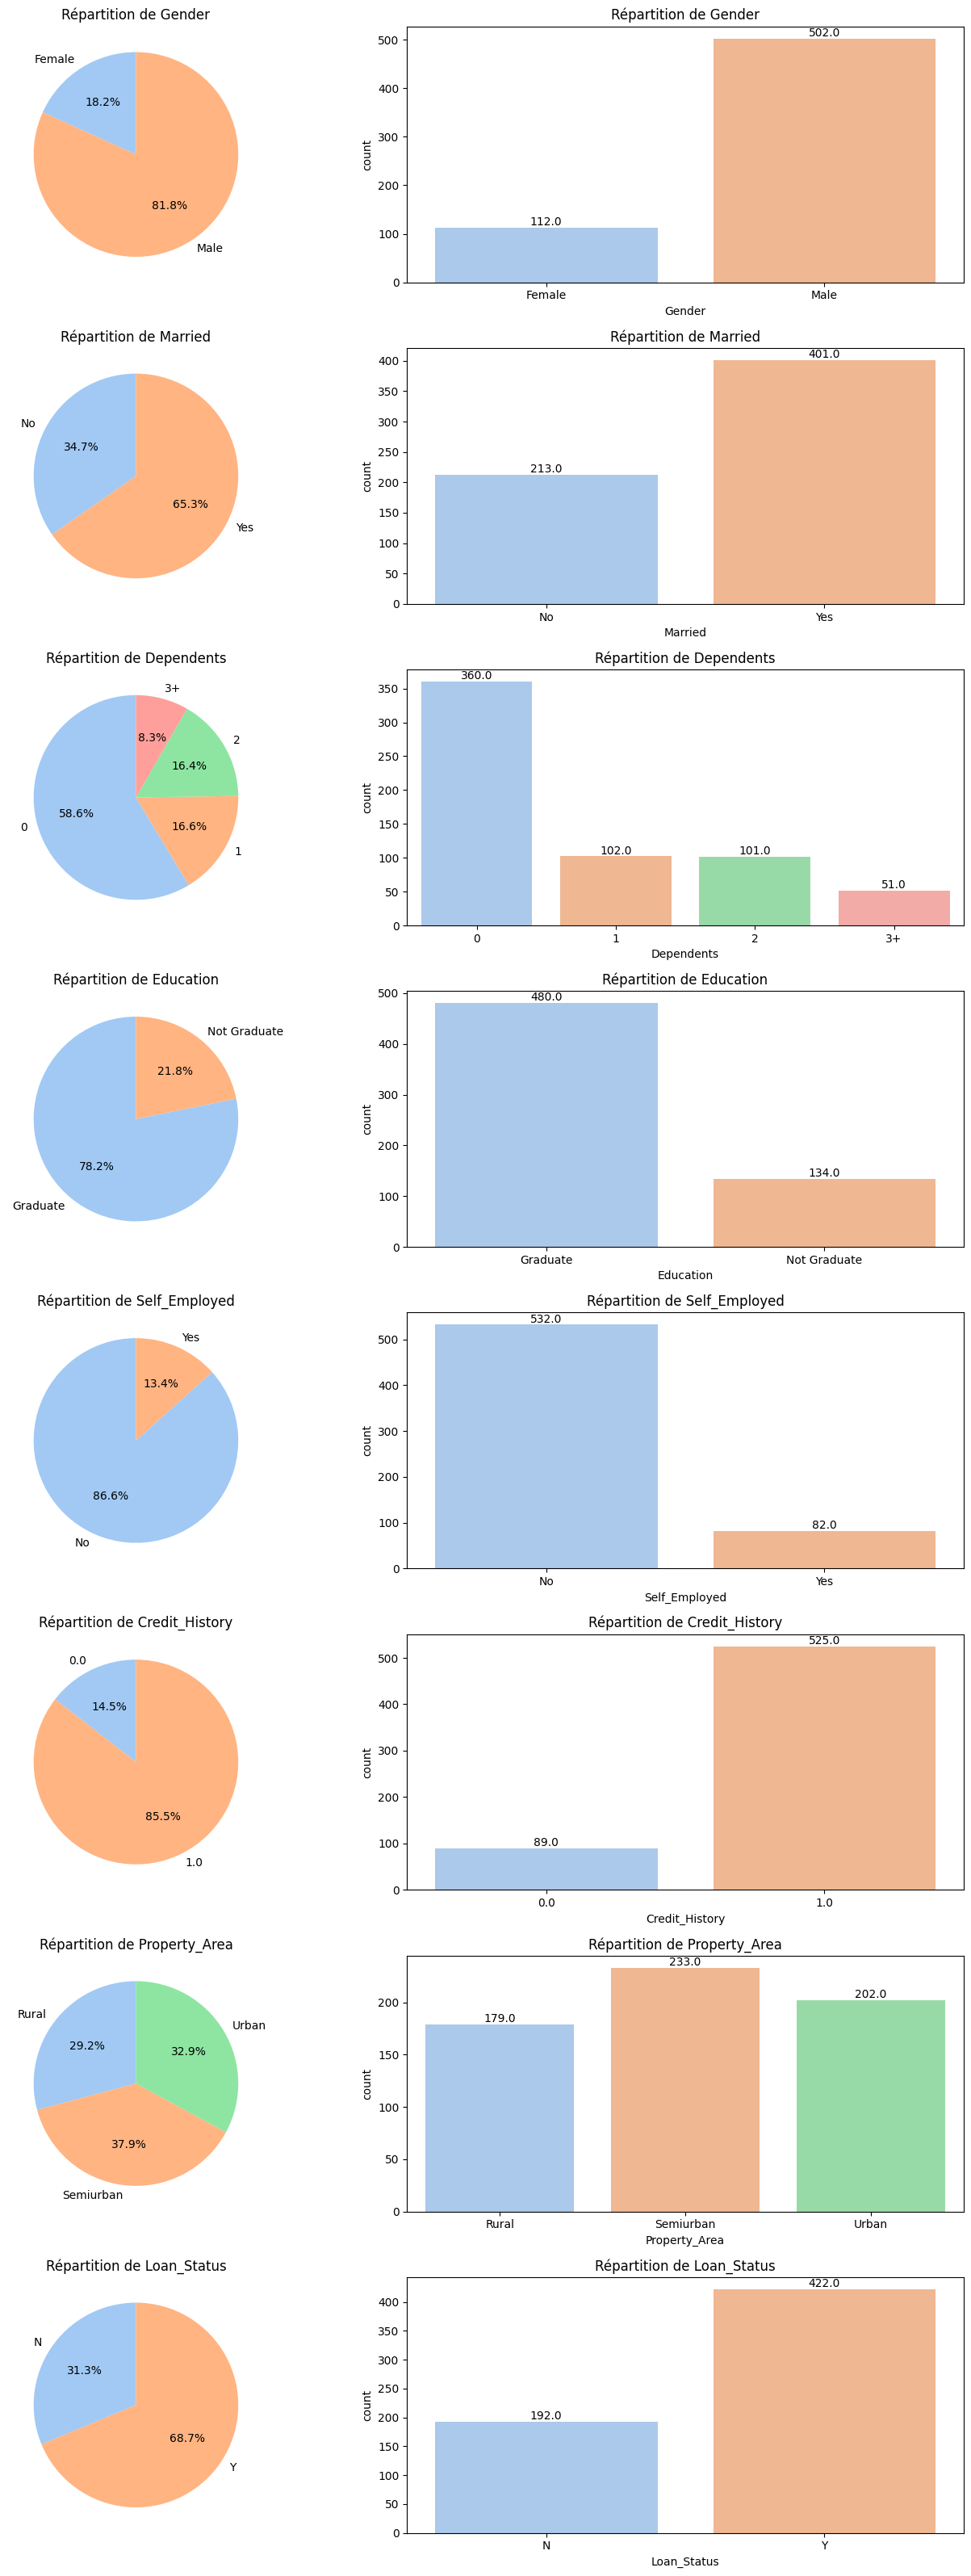

In [4]:
# Liste des colonnes catégorielles
cat_df = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

# Création des graphiques
fig, axes = plt.subplots(len(cat_df), 2, figsize=(14, len(cat_df) * 4))

for i, col in enumerate(cat_df):
    # Récupérer les catégories uniques et les trier
    labels = df[col].unique()

    # Créer une palette de couleurs cohérente pour cette colonne
    palette = sns.color_palette('pastel', len(labels))

    # Camembert : on trie les valeurs pour s'assurer que l'ordre est correct
    value_counts = df[col].value_counts().sort_index()  # Trier par index pour assurer le bon ordre
    value_counts.plot(kind='pie', ax=axes[i, 0], autopct='%1.1f%%', startangle=90, colors=palette)
    axes[i, 0].set_title(f"Répartition de {col}")
    axes[i, 0].set_ylabel("")

    # Diagramme en barres : on passe la palette de couleurs au diagramme en barres
    sns.countplot(x=df[col], ax=axes[i, 1], order=sorted(df[col].unique()), palette=palette, hue=None)
    axes[i, 1].set_title(f"Répartition de {col}")
    axes[i, 1].set_xlabel(col)

    # Ajouter les valeurs au-dessus des barres
    for p in axes[i, 1].patches:
        axes[i, 1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


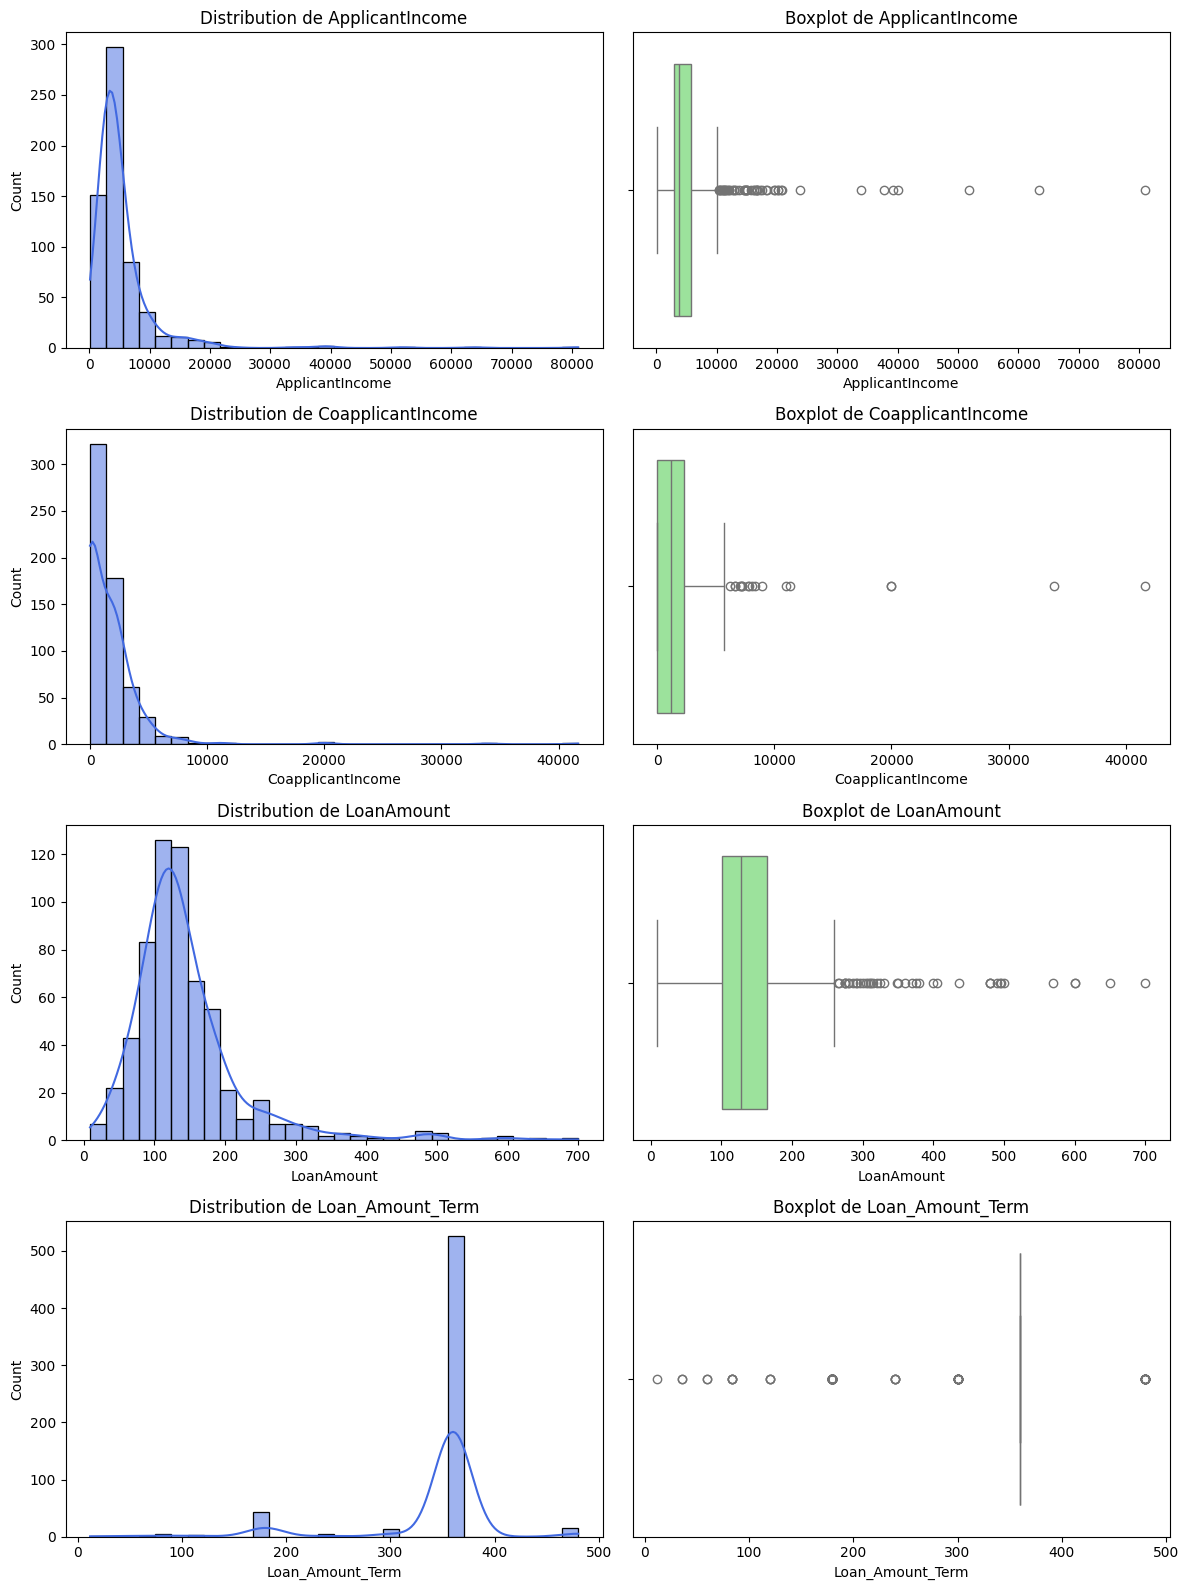

In [7]:
# Sélection des colonnes numériques
num_df = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Création de la figure avec 2 colonnes
fig, axes = plt.subplots(len(num_df), 2, figsize=(12, len(num_df) * 4))

# Parcourir chaque colonne pour afficher les histogrammes et boxplots
for i, col in enumerate(num_df):
    # Histogramme
    sns.histplot(df[col].dropna(), bins=30, kde=True, ax=axes[i, 0], color='royalblue')
    axes[i, 0].set_title(f"Distribution de {col}")
    
    # Boxplot
    sns.boxplot(x=df[col].dropna(), ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f"Boxplot de {col}")

# Ajuster l'affichage pour éviter les chevauchements
plt.tight_layout()
plt.show()


## **Analyse Bivariée**

### **Variables qualitatives & Loan_Status**

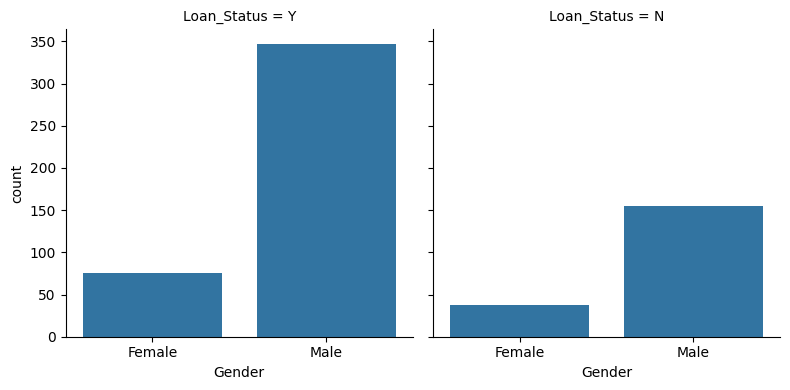

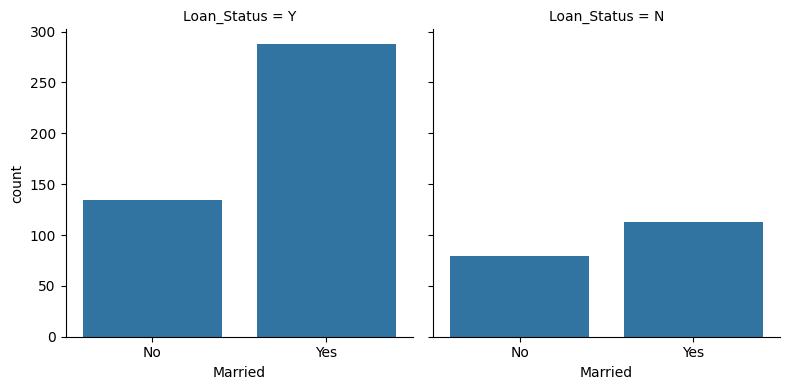

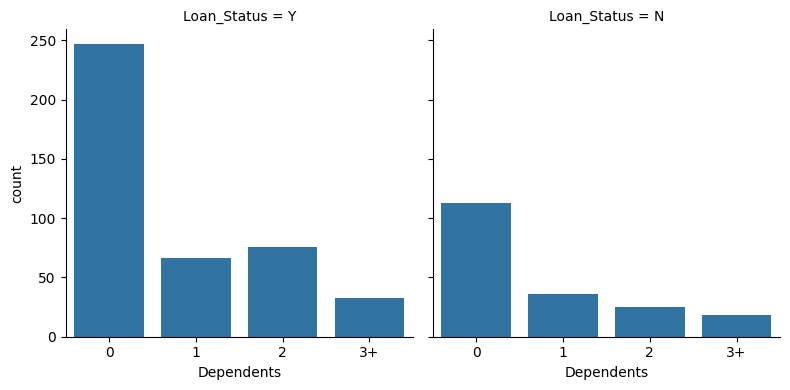

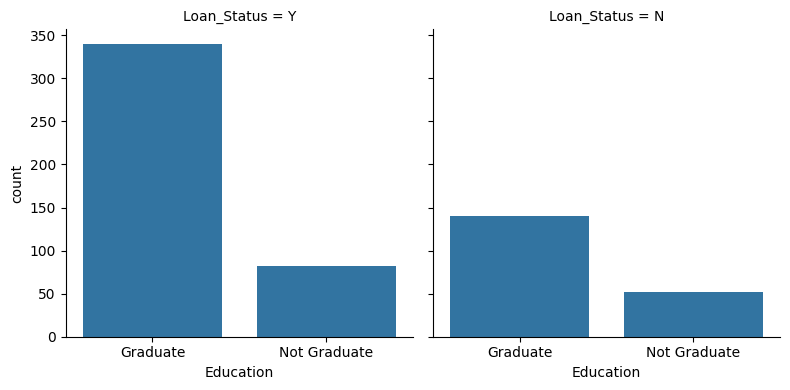

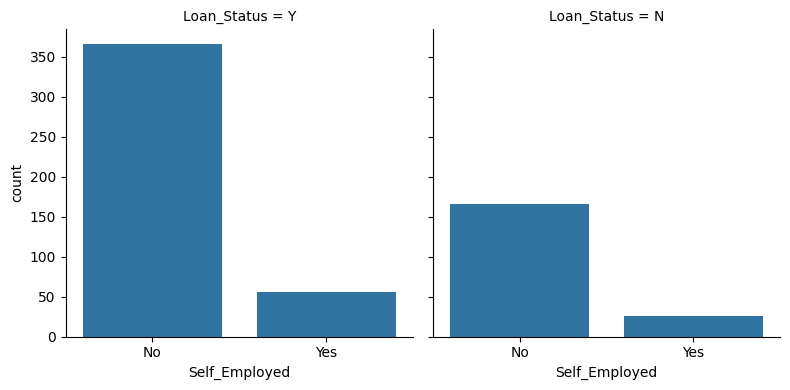

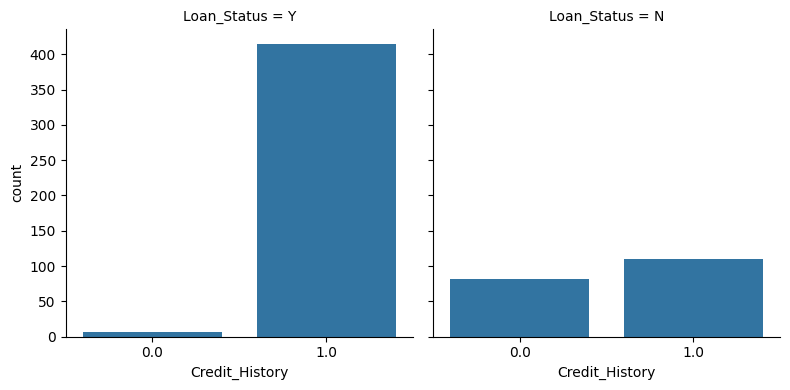

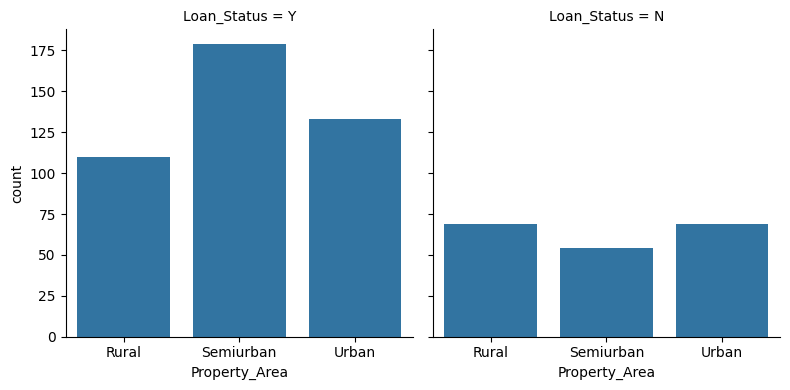

In [9]:
# Création de la nouvelle variable cat_train1 en excluant 'Loan_Status'
cat_df1 = [col for col in cat_df if col != 'Loan_Status']

# Créer un FacetGrid pour chaque colonne catégorielle
for col in cat_df1:
    grid = sns.FacetGrid(df, col="Loan_Status", height=4, aspect=1)
    grid.map(sns.countplot, col, order=sorted(df[col].unique()))

plt.show()

### **Interprétation**

1. L'historique du crédit semble être le facteur le plus déterminant pour l'obtention d'un prêt. <br>
2. D'autres variables semblent également influencer l'approbation notamment le statut matrimonial, l'éducation et le nombre de personnes à charges.

**Nous allons effectuer des tests statistiques afin d'infirmer ou affirmer ces hypothèses**


In [11]:
# Initialiser les listes pour stocker les résultats
var_names = []
chi2_stats = []
p_values = []
cramer_vs = []

# Parcourir toutes les variables catégorielles
for var in cat_df1:
    # Calculer le tableau de contingence
    contingency_table = pd.crosstab(df['Loan_Status'], df[var])
    # Calculer la statistique de test du Chi-deux et la p-valeur
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Calculer le coefficient V de Cramer
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    r,k = contingency_table.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rc = r-((r-1)**2)/(n-1)
    kc = k-((k-1)**2)/(n-1)
    cramer_v = np.sqrt(phi2corr/min(rc-1,kc-1))
    # Ajouter les résultats aux listes correspondantes
    var_names.append(var)
    chi2_stats.append(chi2)
    p_values.append(p)
    cramer_vs.append(cramer_v)

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Variable': var_names,
    'Chi2': chi2_stats,
    'P-valeur': p_values,
    'V de Cramer': cramer_vs
})

# Trier le DataFrame par ordre croissant de V de Cramer
results_df.sort_values(by='V de Cramer', inplace=True,ascending=False)

# Afficher le tableau des résultats
results_df

,Variable,Chi2,P-valeur,V de Cramer
5,Credit_History,176.114575,3.418350e-40,0.534478
6,Property_Area,12.297623,2.136019e-03,0.129590
1,Married,4.731876,2.960858e-02,0.078008
3,Education,4.091490,4.309962e-02,0.070997
2,Dependents,3.151399,3.688663e-01,0.015460
0,Gender,0.110879,7.391461e-01,0.000000
4,Self_Employed,0.000000,1.000000e+00,0.000000


**Conclusion :**

On peux envisager d'exclure ***Gender, Dependents, et Self_Employed*** de notre modèle, car elles n'ont pas de relation significative avec la cible.

### **Variables quantitatives & Loan_Status**

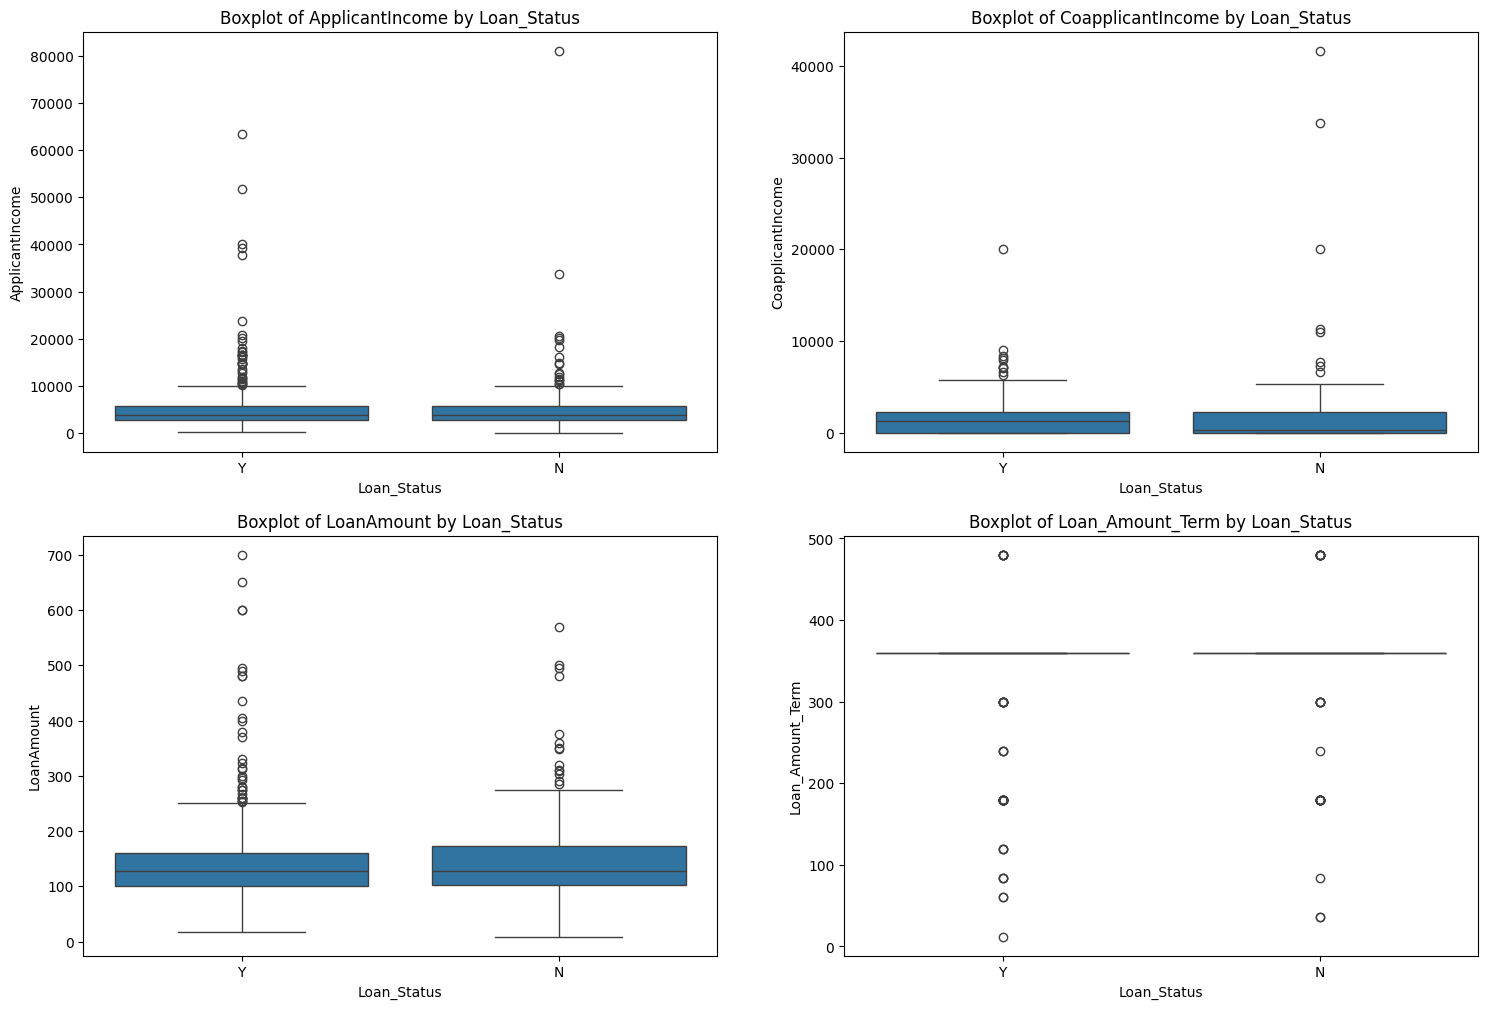

In [12]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(num_df):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Loan_Status', y=col, data=df)
    plt.title(f'Boxplot of {col} by Loan_Status')

### **Interprétation**

  **ApplicantIncome & Loan_Status** : La médiane des revenus des demandeurs semble similaire pour les prêt acceptés et refusés : le revenu  du demandeur seul ne semble pas être un facteurs déterminant dans l'ontention du prêt, car les distributions sont proches : Cette interprétation s'applique également à toutes les autres variables.

  **Vérifions celà à l'aide d'un test statistique**

In [13]:
target_values =  {'Y':1, 'N':0}
df['Loan_Status']= df['Loan_Status'].map(target_values)

In [14]:
# Initialiser les listes pour stocker les résultats
var_names = []
kw_stats = []
p_values = []

# Parcourir toutes les variables numériques
for var in num_df:
    # Calculer les groupes de valeurs
    groups = [df[df['Loan_Status'] == 0][var], df[df['Loan_Status'] == 1][var]]
    # Appliquer le test de Kruskal-Wallis
    kw_stat, p = stats.kruskal(*groups)
    # Ajouter les résultats aux listes correspondantes
    var_names.append(var)
    kw_stats.append(kw_stat)
    p_values.append(p)

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Variable': var_names,
    'Kruskal-Wallis': kw_stats,
    'P-valeur': p_values
})

# Trier le DataFrame par ordre croissant de p-valeur
results_df.sort_values(by='P-valeur', inplace=True)

# Afficher le tableau des résultats
results_df

,Variable,Kruskal-Wallis,P-valeur
1,CoapplicantIncome,0.749191,0.386733
2,LoanAmount,0.715969,0.397469
3,Loan_Amount_Term,0.469114,0.493395
0,ApplicantIncome,0.010620,0.917920


Les p_valeur > 0.05, nous indique qu'aucune de ces variables seule n'influence la décision de prêt.